In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional

plt.rcParams["font.family"] = "Times New Roman"

final_papers = pd.read_excel('final_papers_with_metadata.xlsx')

In [27]:
def column_value_frequencies(df: pd.DataFrame, column: str, dropna: bool = False) -> dict:
    """Return a mapping of unique values in a column to their frequency.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    column : str
        The column name to analyse.
    dropna : bool, default False
        When True, missing values are excluded from the frequency count.

    Returns
    -------
    dict
        Dictionary mapping each unique value to its frequency count.
    """
    if column not in df.columns:
        raise KeyError(f"Column '{column}' not found in DataFrame.")

    counts = df[column].value_counts(dropna=dropna)
    return counts.to_dict()

def plot_bar_from_dict(
    data: dict,
    x_label: str,
    y_label: str,
    title: str,
    *,
    sort_by: Optional[str] = "value",
    ascending: bool = False,
    color: str = "#4d4d4d",
    edgecolor: str = "#000000",
    annotate: bool = True,
    figsize: tuple = (10, 6),
    title_fontsize: Optional[int] = None,
    label_fontsize: Optional[int] = None,
    tick_label_fontsize: Optional[int] = None,
    annotation_fontsize: Optional[int] = None,
):
    """Plot a bar chart from a dictionary of counts.

    Parameters
    ----------
    data : dict
        Mapping of labels to numeric values.
    x_label : str
        Label for the x-axis.
    y_label : str
        Label for the y-axis.
    title : str
        Plot title.
    sort_by : {"value", "key", None}, default "value"
        Sort the bars by dictionary values or keys before plotting. If None,
        preserve the order of the dictionary.
    ascending : bool, default False
        Sort order for the bars.
    color : str, default "#4d4d4d"
        Fill color for the bars (use greyscale for print-friendly output).
    edgecolor : str, default "#000000"
        Edge color for the bars.
    annotate : bool, default True
        If True, add the count above each bar.
    figsize : tuple, default (10, 6)
        Figure size passed to Matplotlib.
    title_fontsize : int, optional
        Font size for the plot title.
    label_fontsize : int, optional
        Font size for the x and y axis labels.
    tick_label_fontsize : int, optional
        Font size for the x and y axis tick labels.
    annotation_fontsize : int, optional
        Font size for the bar value annotations.

    Returns
    -------
    matplotlib.axes.Axes
        The matplotlib Axes object containing the bar plot.
    """
    if not data:
        raise ValueError("The input dictionary is empty; nothing to plot.")

    items = list(data.items())

    if sort_by is not None:
        normalized_sort_by = sort_by.lower()
        if normalized_sort_by not in {"value", "key"}:
            raise ValueError("sort_by must be either 'value', 'key', or None.")
        reverse = not ascending
        if normalized_sort_by == "value":
            items.sort(key=lambda item: item[1], reverse=reverse)
        else:
            items.sort(key=lambda item: item[0], reverse=reverse)

    labels, values = zip(*items)
    positions = range(len(labels))

    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(positions, values, color=color, edgecolor=edgecolor)

    ax.set_xticks(list(positions))
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=tick_label_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.set_title(title, fontsize=title_fontsize)

    # Set y-axis tick label font size
    ax.tick_params(axis='y', labelsize=tick_label_fontsize)

    max_value = max(values)
    if max_value > 0:
        upper_limit = max_value + max(1, max_value * 0.15)
    else:
        upper_limit = 1
    ax.set_ylim(0, upper_limit)

    if annotate:
        for bar, value in zip(bars, values):
            ax.annotate(
                f"{value}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=annotation_fontsize,
            )

    ax.grid(axis="y", color="#bfbfbf", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.set_axisbelow(True)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    return ax

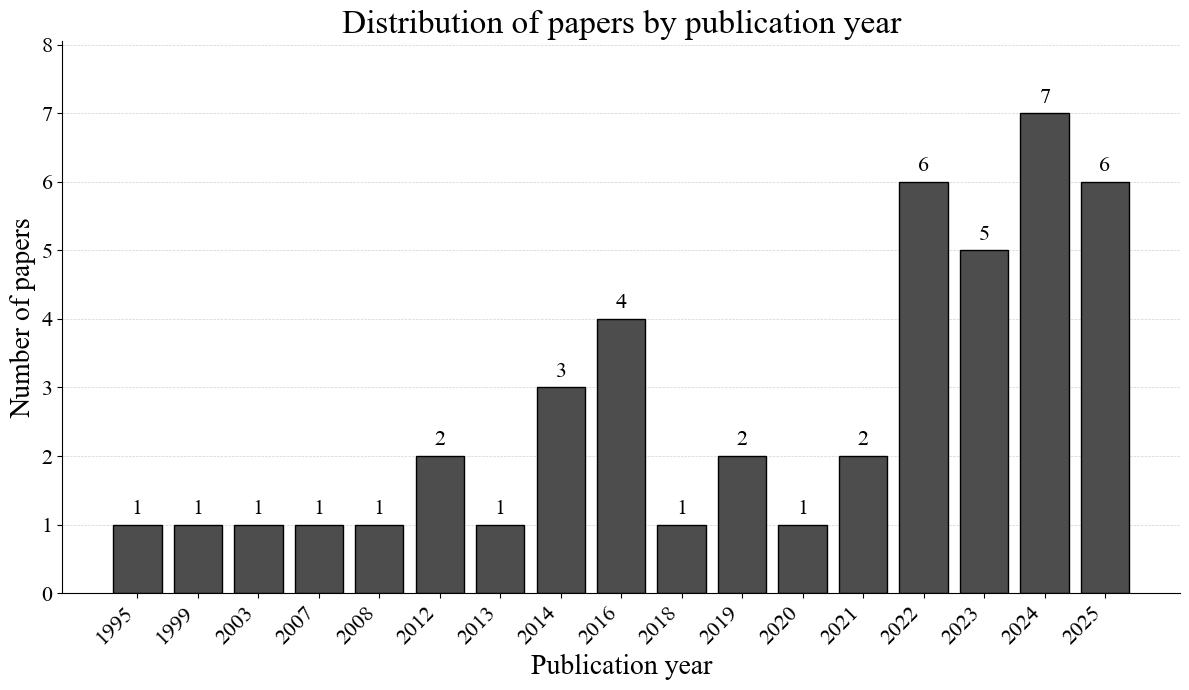

In [28]:
# Create a new cell in your notebook and add the following code:

# 1. Calculate the frequency of papers for each year using the helper function.
# The 'Year' column is used to get the counts.
year_frequencies = column_value_frequencies(final_papers, 'Year', dropna=False)

# 2. Plot the resulting frequencies using the custom plotting function.
# We sort by 'key' (the year) in ascending order to ensure a chronological x-axis.
plot_bar_from_dict(
    data=year_frequencies,
    x_label="Publication year",
    y_label="Number of papers",
    title="Distribution of papers by publication year",
    sort_by="key",  # Sort by year to maintain chronological order
    ascending=True,
    figsize=(12, 7), # Adjusted figsize for better readability with more bars
    title_fontsize=24,
    label_fontsize=20,
    tick_label_fontsize=16, # Slightly smaller font for year labels if they overlap
    annotation_fontsize=16,
)
plt.show()

In [18]:
import pandas as pd
import plotly.express as px

# Your dataset
data = {
    "journal": final_papers['Source'].value_counts().index.tolist(),
    "count": final_papers['Source'].value_counts().values.tolist()
}
df = pd.DataFrame(data)

# Create the treemap
fig = px.treemap(
    df,
    path=['journal'],        # single-level categories
    values='count',
    color='count',           # color by count
    color_continuous_scale='Greys',
    title="Number Of Papers Distributed Across Journals"
)

# Show label + value inside boxes
fig.update_traces(textinfo="label+value")
fig.update_layout(margin=dict(t=60, l=10, r=10, b=10))

# Display in a notebook or open a browser window (in scripts, fig.show() will open a browser)
fig.show()

# Optional: save a static image (requires kaleido)
# fig.write_image("treemap_plotly.png", scale=2)